In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [9]:
df = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False)

In [10]:
df1 = df.drop(['Date', 'Time'], axis=1)

1. Carregue o dataset e exiba as 10 primeiras linhas.

In [11]:
df1.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,3.662,0.510,233.860,15.800,0.000,2.000,16.0


2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 110.8+ MB


In [13]:
df1 = df1.apply(pd.to_numeric, errors='coerce')

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 110.8 MB


3. Verifique se existem valores ausentes no dataset. Quantifique-os.

In [15]:
df1.isna().sum()

,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


In [16]:
perc = 100 * (25979 / df.shape[0])
print(f'O percentual de registros ausentes é de {perc: .3f}%')

O percentual de registros ausentes é de  1.252%


Excluir registros ausentes df1 = df1.dropna()

In [17]:
#Excluir registros ausentes
df1 = df1.dropna()

4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana
correspondente.

In [18]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Day_of_week'] = df['Date'].dt.day_name()
display(df.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_of_week
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,Saturday


5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de
Global_active_power.

In [19]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df_2007 = df[df['Date'].dt.year == 2007]
daily_average_power_2007 = df_2007.groupby('Date')['Global_active_power'].mean()
display(daily_average_power_2007.head())

,Global_active_power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281


6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à
sua escolha.

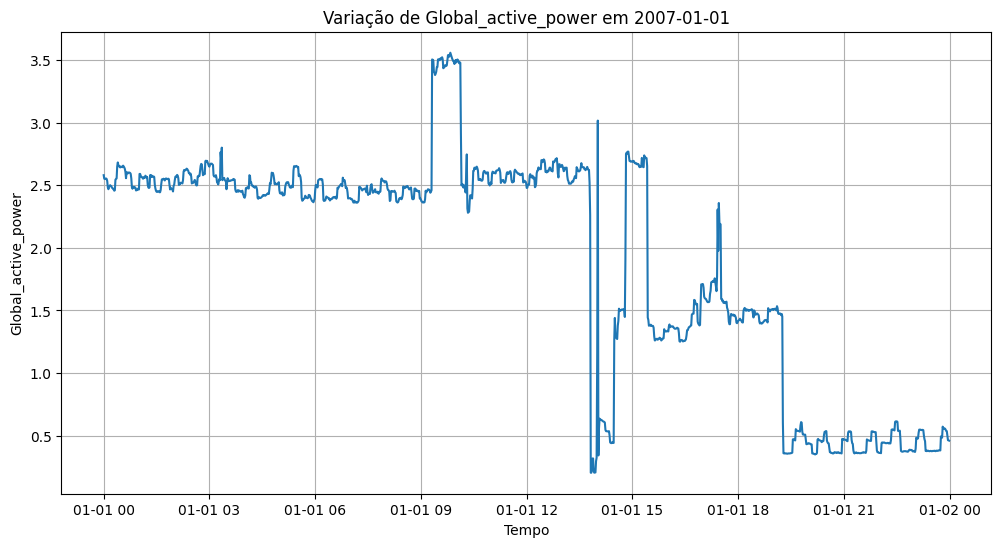

In [20]:
# Escolhendo um dia aleatório
date_to_plot = '2007-01-01'

# Filtrar somente o dia no df
df_single_day = df[df['Date'] == date_to_plot].copy()

# Combinar date com time para plotar
df_single_day['Datetime'] = pd.to_datetime(df_single_day['Date'].astype(str) + ' ' + df_single_day['Time'])

# Plot do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_single_day['Datetime'], df_single_day['Global_active_power'])
plt.title(f'Variação de Global_active_power em {date_to_plot}')
plt.xlabel('Tempo')
plt.ylabel('Global_active_power')
plt.grid(True)
plt.show()

7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?

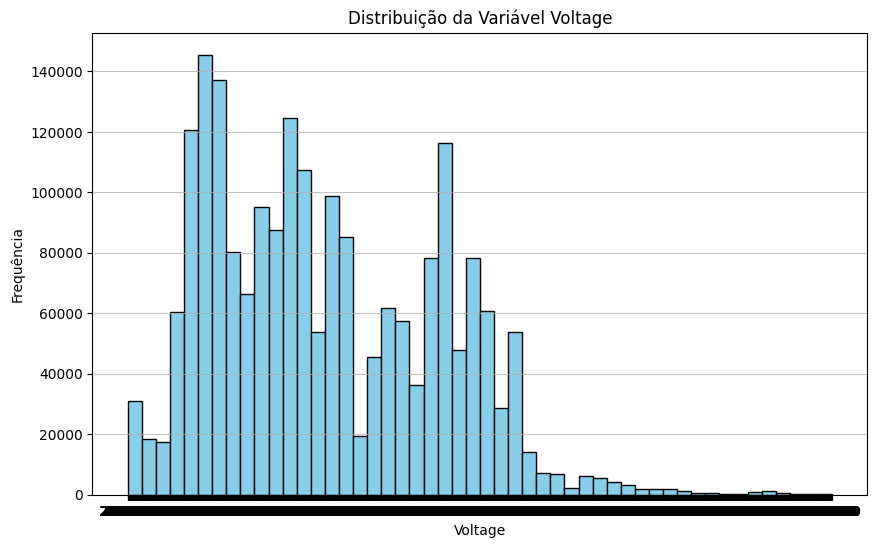

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df['Voltage'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribuição da Variável Voltage')
plt.xlabel('Voltage')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

Quanto maior a voltagem menor a frequência

8. Calcule o consumo médio por mês em todo o período disponível no dataset.

In [22]:
df['Month_Year'] = df['Date'].dt.to_period('M')
monthly_average_power = df.groupby('Month_Year')['Global_active_power'].mean()
display(monthly_average_power.head())

,Global_active_power
Month_Year,
2006-12,1.901295
2007-01,1.546034
2007-02,1.401084
2007-03,1.318627
2007-04,0.891189


9. Identifique o dia com maior consumo de energia ativa global (Global_active_power)

In [23]:
daily_total_power = df.groupby('Date')['Global_active_power'].sum()
day_with_highest_consumption = daily_total_power.idxmax()
highest_consumption_value = daily_total_power.max()

print(f"O dia com maior consumo de energia ativa global foi {day_with_highest_consumption.strftime('%Y-%m-%d')} com um total de {highest_consumption_value:.2f}.")

O dia com maior consumo de energia ativa global foi 2006-12-23 com um total de 4773.39.


10. Compare o consumo médio de energia ativa global em dias de semana versus finais de
semana.

In [24]:
df['Weekday_Weekend'] = df['Day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
average_power_by_day_type = df.groupby('Weekday_Weekend')['Global_active_power'].mean()
display(average_power_by_day_type)

,Global_active_power
Weekday_Weekend,
Weekday,1.035472
Weekend,1.234232


11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power,
Voltage e Global_intensity.

In [25]:
for col in ['Global_reactive_power', 'Voltage', 'Global_intensity']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

correlation_matrix = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr()
display(correlation_matrix)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.247017,-0.399762,0.998889
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120
Voltage,-0.399762,-0.112246,1.000000,-0.411363
Global_intensity,0.998889,0.266120,-0.411363,1.000000


12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1,
Sub_metering_2 e Sub_metering_3.


In [26]:
for col in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
display(df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']].head())

,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
0,0.0,1.0,17.0,18.0
1,0.0,1.0,16.0,17.0
2,0.0,2.0,17.0,19.0
3,0.0,1.0,17.0,18.0
4,0.0,1.0,17.0,18.0


13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de
Global_active_power.


In [27]:
# Calculate monthly average of Total_Sub_metering
monthly_average_sub_metering = df.groupby('Month_Year')['Total_Sub_metering'].mean()

# Calculate monthly average of Global_active_power (already calculated as monthly_average_power)
# monthly_average_power = df.groupby('Month_Year')['Global_active_power'].mean()

# Compare monthly averages
months_exceeding_average = monthly_average_sub_metering[monthly_average_sub_metering > monthly_average_power]

if not months_exceeding_average.empty:
    print("Há meses em que a média de Total_Sub_metering ultrapassa a média de Global_active_power.")
else:
    print("Não há meses em que a média de Total_Sub_metering ultrapassa a média de Global_active_power.")

Há meses em que a média de Total_Sub_metering ultrapassa a média de Global_active_power.


14. Faça um gráfico de série temporal do Voltage para o ano de 2008.

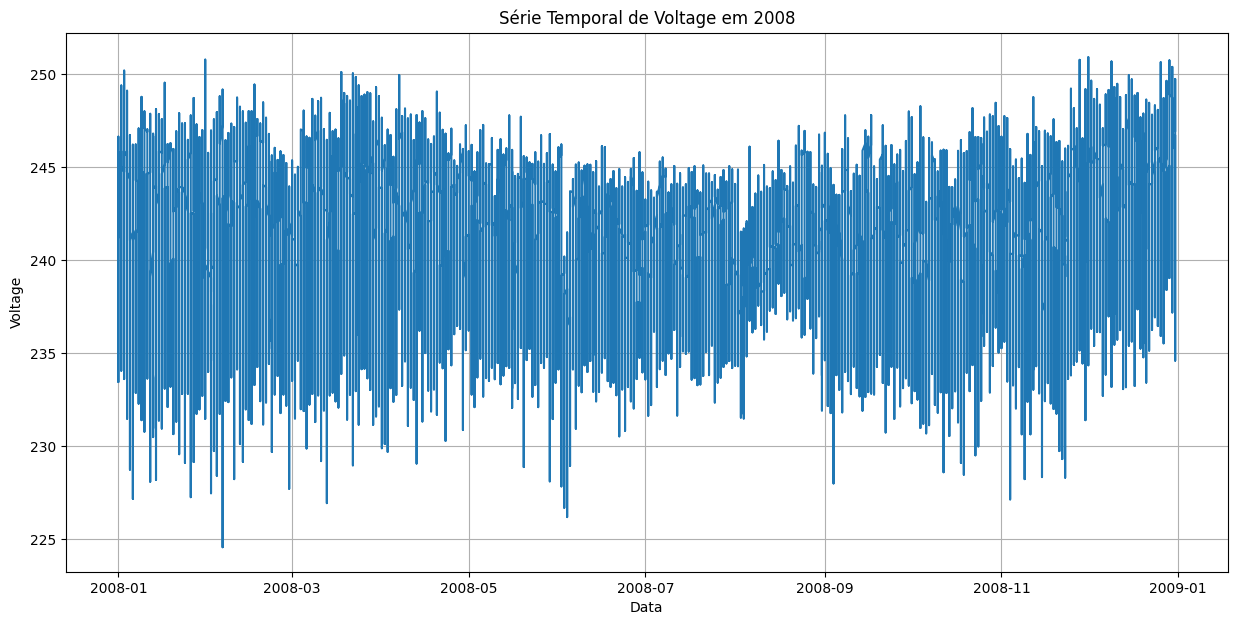

In [28]:
df_2008 = df[df['Date'].dt.year == 2008]

plt.figure(figsize=(15, 7))
plt.plot(df_2008['Date'], df_2008['Voltage'])
plt.title('Série Temporal de Voltage em 2008')
plt.xlabel('Data')
plt.ylabel('Voltage')
plt.grid(True)
plt.show()

15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).

In [29]:
# Definir meses de verao e inverno
summer_months = [6, 7, 8]
winter_months = [12, 1, 2]

# Filtrando data
df_summer = df[df['Date'].dt.month.isin(summer_months)]
df_winter = df[df['Date'].dt.month.isin(winter_months)]

# Calcular média
average_power_summer = df_summer['Global_active_power'].mean()
average_power_winter = df_winter['Global_active_power'].mean()

# Display
print(f"Média de Global_active_power no verão: {average_power_summer:.2f}")
print(f"Média de Global_active_power no inverno: {average_power_winter:.2f}")

Média de Global_active_power no verão: 0.73
Média de Global_active_power no inverno: 1.42


16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de
Global_active_power é semelhante à da base completa.

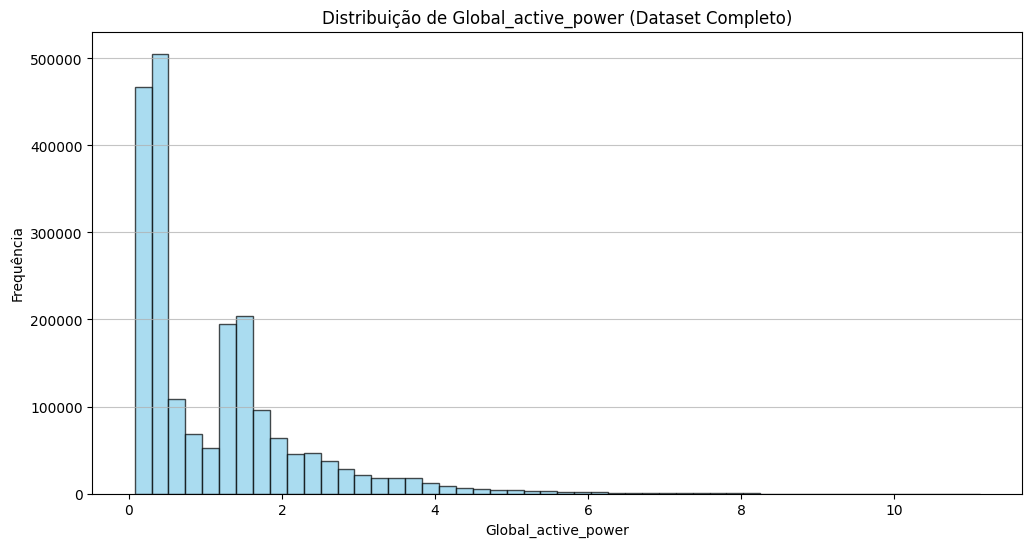

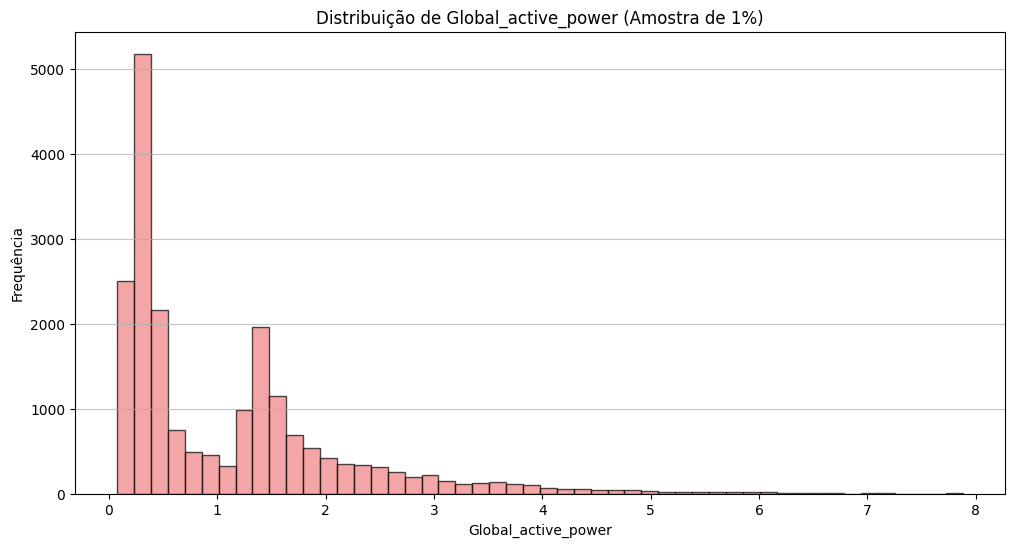

In [30]:
# Exemplo 1%
df_sample = df.sample(frac=0.01, random_state=42)

# Plotando histograma
plt.figure(figsize=(12, 6))
plt.hist(df['Global_active_power'].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuição de Global_active_power (Dataset Completo)')
plt.xlabel('Global_active_power')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plotando histograma pro exemplo
plt.figure(figsize=(12, 6))
plt.hist(df_sample['Global_active_power'].dropna(), bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Distribuição de Global_active_power (Amostra de 1%)')
plt.xlabel('Global_active_power')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis
numéricas principais.

In [31]:
# Selecionando colunas numéricas
numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                  'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']

# MinMaxScaler
scaler = MinMaxScaler()

# Aplicando minmax
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display
display(df[numerical_cols].head())

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
0,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,0.134328
1,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,0.126866
2,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,0.141791
3,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,0.134328
4,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,0.134328


18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico.
Interprete os resultados.

In [34]:
df_daily = df.groupby('Date')[numerical_cols].mean()
display(df_daily.head())

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
Date,,,,,,,,
2006-12-16,0.269552,0.063444,0.421446,0.267279,0.000000,0.017235,0.401271,0.103121
2006-12-17,0.206273,0.112913,0.545623,0.203299,0.016043,0.036345,0.298858,0.101373
2006-12-18,0.131671,0.080831,0.582607,0.129080,0.008389,0.022752,0.314023,0.091739
2006-12-19,0.097871,0.075411,0.607409,0.098058,0.006621,0.065990,0.138822,0.075860
2006-12-20,0.133049,0.080435,0.617385,0.130028,0.000000,0.022986,0.315031,0.086603


In [37]:
df_daily = df_daily.dropna()
X = df_daily[numerical_cols].values

In [41]:
from sklearn.cluster import KMeans

# Aplicando K-means clusterizando  em 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_daily['Cluster'] = kmeans.fit_predict(X)

# Display
display(df_daily.head())

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering,Cluster
Date,,,,,,,,,
2006-12-16,0.269552,0.063444,0.421446,0.267279,0.000000,0.017235,0.401271,0.103121,1
2006-12-17,0.206273,0.112913,0.545623,0.203299,0.016043,0.036345,0.298858,0.101373,1
2006-12-18,0.131671,0.080831,0.582607,0.129080,0.008389,0.022752,0.314023,0.091739,1
2006-12-19,0.097871,0.075411,0.607409,0.098058,0.006621,0.065990,0.138822,0.075860,0
2006-12-20,0.133049,0.080435,0.617385,0.130028,0.000000,0.022986,0.315031,0.086603,1


In [42]:
# Analisando
cluster_analysis = df_daily.groupby('Cluster')[numerical_cols].mean()
display(cluster_analysis)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
Cluster,,,,,,,,
0,0.067228,0.091180,0.577298,0.068554,0.008628,0.011777,0.143050,0.045791
1,0.117315,0.088377,0.586981,0.115577,0.016466,0.020298,0.273474,0.086198
2,0.071726,0.079736,0.387392,0.074452,0.013394,0.016346,0.160400,0.055663


19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para
Global_active_power em um período de 6 meses.

In [54]:
# Periodo de 6 meses
start_date = '2007-01-01'
end_date = '2007-06-30'

# Filtrando df
df_period = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()

# Display
display(df_period.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_of_week,Month_Year,Weekday_Weekend,Total_Sub_metering
21996,2007-01-01,00:00:00,0.226688,0.097842,0.606462,0.215768,0.0,0.0,0.0,Monday,2007-01,Weekday,0.0
21997,2007-01-01,00:01:00,0.224154,0.071942,0.599354,0.211618,0.0,0.0,0.0,Monday,2007-01,Weekday,0.0
21998,2007-01-01,00:02:00,0.223972,0.071942,0.595800,0.211618,0.0,0.0,0.0,Monday,2007-01,Weekday,0.0
21999,2007-01-01,00:03:00,0.223972,0.071942,0.598061,0.211618,0.0,0.0,0.0,Monday,2007-01,Weekday,0.0
22000,2007-01-01,00:04:00,0.224335,0.071942,0.606785,0.211618,0.0,0.0,0.0,Monday,2007-01,Weekday,0.0


In [55]:
df_period['Datetime'] = pd.to_datetime(df_period['Date'].astype(str) + ' ' + df_period['Time'])
df_period = df_period.set_index('Datetime')
daily_power = df_period['Global_active_power'].resample('D').mean()
display(daily_power.head())

,Global_active_power
Datetime,
2007-01-01,0.165945
2007-01-02,0.072915
2007-01-03,0.056872
2007-01-04,0.198034
2007-01-05,0.163705


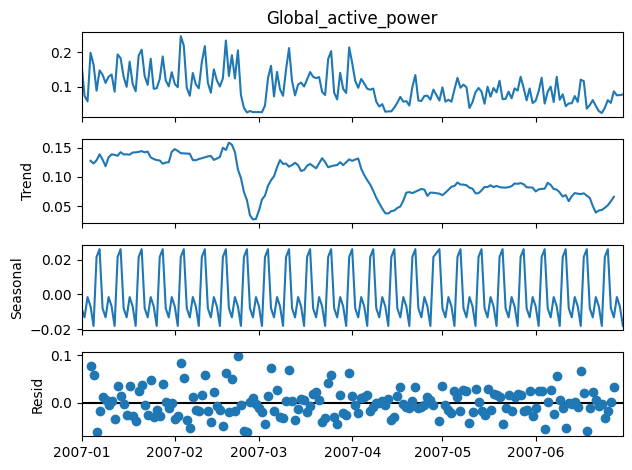

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aplicando decomposição sazonal - semanal
decomposition = seasonal_decompose(daily_power.dropna(), model='additive', period=7)

# Display
decomposition.plot()
plt.show()

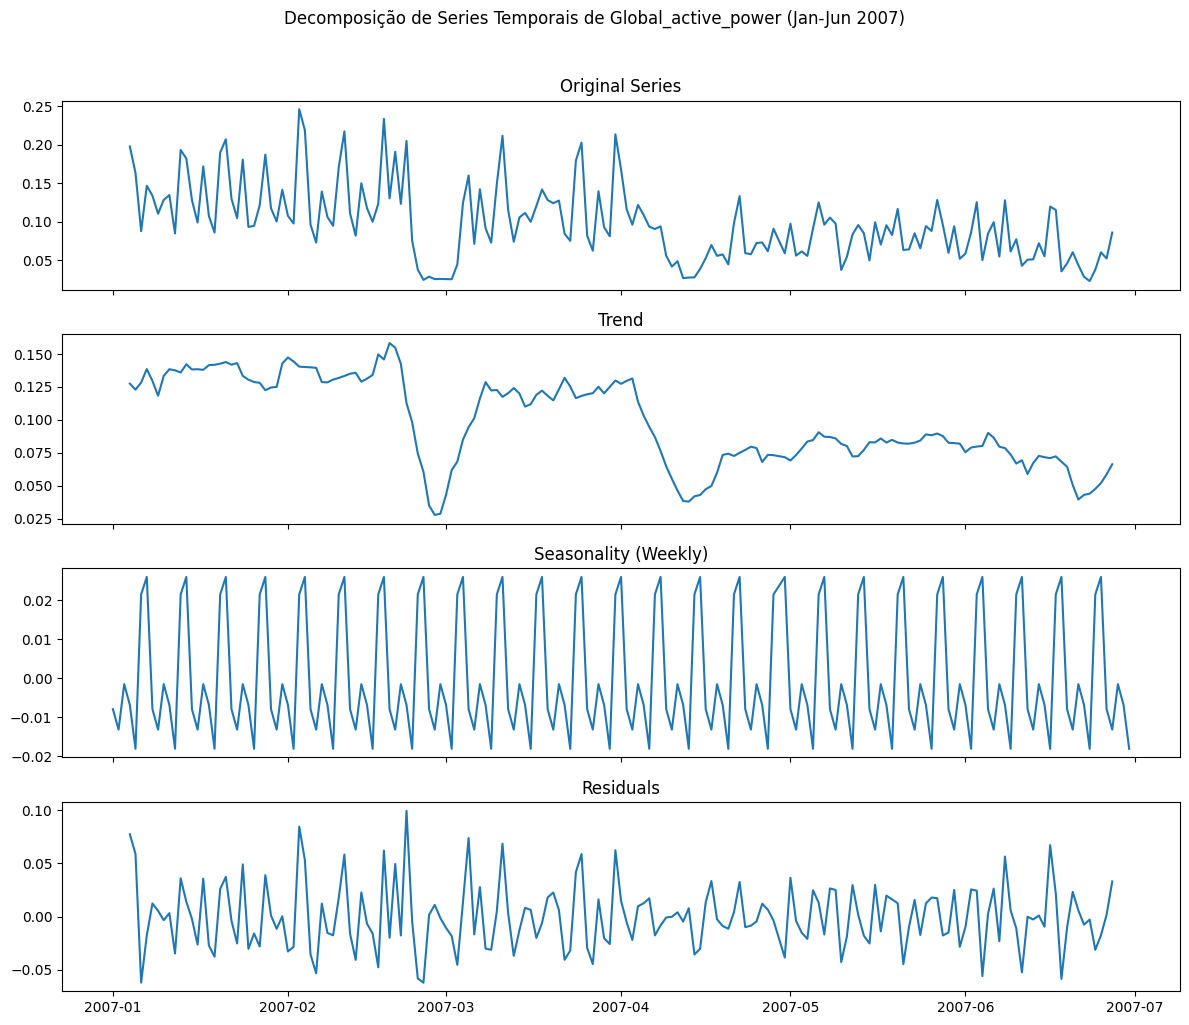

In [58]:
# Tirando NaNs
trend = decomposition.trend.dropna()
seasonal = decomposition.seasonal.dropna()
resid = decomposition.resid.dropna()

daily_power_aligned = daily_power.loc[trend.index]

# Criando subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot original
axes[0].plot(daily_power_aligned.index, daily_power_aligned)
axes[0].set_title('Original Series')

# Plot trend
axes[1].plot(trend.index, trend)
axes[1].set_title('Trend')

# Plot sazonal
axes[2].plot(seasonal.index, seasonal)
axes[2].set_title('Seasonality (Weekly)')

# Plot residual
axes[3].plot(resid.index, resid)
axes[3].set_title('Residuals')

# Adicionando título
fig.suptitle('Decomposição de Series Temporais de Global_active_power (Jan-Jun 2007)', y=1.02)
plt.tight_layout()
plt.show()

In [59]:
print("Análise da Decomposição da Série Temporal de Global_active_power (Janeiro a Junho de 2007):")
print("\nComponente de Tendência:")
print("A componente de tendência mostra o movimento de longo prazo da série temporal. No período de 6 meses, observamos uma tendência geralmente decrescente na Global_active_power, com algumas flutuações.")

print("\nComponente de Sazonalidade:")
print("A componente de sazonalidade revela padrões repetitivos em intervalos fixos. Com um período de 7 (semanal), o gráfico de sazonalidade exibe um padrão semanal claro. Podemos observar picos de consumo em certos dias da semana e quedas em outros, refletindo o comportamento de uso de energia durante a semana.")

print("\nComponente de Resíduo:")
print("A componente de resíduo representa as variações irregulares que não são explicadas pela tendência ou sazonalidade. O gráfico de resíduos mostra o 'ruído' na série temporal. Os resíduos parecem variar em torno de zero, indicando que a tendência e a sazonalidade capturaram a maior parte da estrutura da série temporal, mas ainda há alguma variabilidade inexplicada.")

print("\nInterpretação Geral:")
print("A decomposição da série temporal para Global_active_power de janeiro a junho de 2007 indica que o consumo geral teve uma leve tendência de queda durante este período. Além disso, há um forte padrão sazonal semanal no consumo de energia. As flutuações restantes nos resíduos representam variações aleatórias ou outros fatores não capturados pela tendência e sazonalidade semanal.")

Análise da Decomposição da Série Temporal de Global_active_power (Janeiro a Junho de 2007):

Componente de Tendência:
A componente de tendência mostra o movimento de longo prazo da série temporal. No período de 6 meses, observamos uma tendência geralmente decrescente na Global_active_power, com algumas flutuações.

Componente de Sazonalidade:
A componente de sazonalidade revela padrões repetitivos em intervalos fixos. Com um período de 7 (semanal), o gráfico de sazonalidade exibe um padrão semanal claro. Podemos observar picos de consumo em certos dias da semana e quedas em outros, refletindo o comportamento de uso de energia durante a semana.

Componente de Resíduo:
A componente de resíduo representa as variações irregulares que não são explicadas pela tendência ou sazonalidade. O gráfico de resíduos mostra o 'ruído' na série temporal. Os resíduos parecem variar em torno de zero, indicando que a tendência e a sazonalidade capturaram a maior parte da estrutura da série temporal, mas ai

20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de
Global_intensity. Avalie o erro do modelo.

In [66]:
# Preparando os dados
df_reg = df[['Global_intensity', 'Global_active_power']].copy()
df_reg = df_reg.dropna()
display(df_reg.head())
print(f"Number of remaining rows: {df_reg.shape[0]}")

,Global_intensity,Global_active_power
0,0.377593,0.374796
1,0.473029,0.478363
2,0.473029,0.479631
3,0.473029,0.480898
4,0.323651,0.325005


Number of remaining rows: 2049280


In [67]:
from sklearn.model_selection import train_test_split

# Dividindo o df

X = df_reg[['Global_intensity']]
y = df_reg['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1639424, 1)
Shape of X_test: (409856, 1)
Shape of y_train: (1639424,)
Shape of y_test: (409856,)


In [68]:
from sklearn.linear_model import LinearRegression

# Treinando o modelo

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [69]:
# Predições
y_pred = model.predict(X_test)

In [71]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculando média e r2 para verificar veracidade

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 0.0000
R-squared (R2): 0.9978


In [72]:
# Interpretando métricas

print("Avaliação de Desempenho do Modelo:")
print(f"Erro Quadrático Médio (MSE): {mse:.4f}")
print(f"R-quadrado (R2): {r2:.4f}")

print("\nInterpretação:")
print(f"O Erro Quadrático Médio (MSE) de {mse:.4f} indica a diferença quadrada média entre os valores reais de 'Global_active_power' e os valores previstos pelo modelo. Um MSE mais baixo sugere que as previsões do modelo estão mais próximas dos valores reais em média.")
print(f"O valor de R-quadrado (R2) de {r2:.4f} representa a proporção da variância em 'Global_active_power' que é previsível a partir de 'Global_intensity'. Um R2 de {r2:.4f} indica que aproximadamente {r2*100:.2f}% da variância em 'Global_active_power' pode ser explicada por 'Global_intensity' usando este modelo linear. Um valor próximo de 1 sugere um ajuste muito bom.")
print("\nCom base nessas métricas, o modelo de regressão linear parece ter um desempenho excepcional ao prever 'Global_active_power' a partir de 'Global_intensity'.")

Avaliação de Desempenho do Modelo:
Erro Quadrático Médio (MSE): 0.0000
R-quadrado (R2): 0.9978

Interpretação:
O Erro Quadrático Médio (MSE) de 0.0000 indica a diferença quadrada média entre os valores reais de 'Global_active_power' e os valores previstos pelo modelo. Um MSE mais baixo sugere que as previsões do modelo estão mais próximas dos valores reais em média.
O valor de R-quadrado (R2) de 0.9978 representa a proporção da variância em 'Global_active_power' que é previsível a partir de 'Global_intensity'. Um R2 de 0.9978 indica que aproximadamente 99.78% da variância em 'Global_active_power' pode ser explicada por 'Global_intensity' usando este modelo linear. Um valor próximo de 1 sugere um ajuste muito bom.

Com base nessas métricas, o modelo de regressão linear parece ter um desempenho excepcional ao prever 'Global_active_power' a partir de 'Global_intensity'.


## PARTE 2 – Exercícios adicionais no dataset inicial

21. Séries temporais por hora
- Converta Date e Time em índice datetime.
- Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power.
- Identifique os horários de maior consumo médio ao longo do dia.

In [73]:
# Combinando Date e Time
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
df = df.set_index('Datetime')

# Resample
hourly_power = df['Global_active_power'].resample('H').mean()

# Display
display(hourly_power.head())

/tmp/ipython-input-34315476.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_power = df['Global_active_power'].resample('H').mean()


,Global_active_power
Datetime,
2006-12-16 17:00:00,0.375420
2006-12-16 18:00:00,0.321945
2006-12-16 19:00:00,0.300945
2006-12-16 20:00:00,0.289025
2006-12-16 21:00:00,0.269823


In [77]:
# Extraindo a hora
hourly_power = hourly_power.dropna()
hourly_power_by_hour = hourly_power.groupby(hourly_power.index.hour).mean()

# Identificando a hora com o maior consumo
hour_with_highest_consumption = hourly_power_by_hour.idxmax()
highest_consumption_value = hourly_power_by_hour.max()

print(f"A hora com o maior consumo médio é {hour_with_highest_consumption}h com a média de {highest_consumption_value:.4f}.")

A hora com o maior consumo médio é 20h com a média de 0.1650.


22. Autocorrelação do consumo
- Use a série temporal de Global_active_power.
- Calcule a autocorrelação em lags de 1h, 24h e 48h.
- Pergunta: existem padrões repetidos diariamente?

In [79]:
from statsmodels.tsa.stattools import acf

# Claculando autocorrelação em 1, 24, and 48 horas
acf_1h = acf(hourly_power.dropna(), nlags=1)[1]
acf_24h = acf(hourly_power.dropna(), nlags=24)[24]
acf_48h = acf(hourly_power.dropna(), nlags=48)[48]

print(f"Autocorrelação no lag de 1 hora: {acf_1h:.4f}")
print(f"Autocorrelação no lag de 24 horas: {acf_24h:.4f}")
print(f"Autocorrelação no lag de 48 horas: {acf_48h:.4f}")

# Interpretando
print("\nInterpretação:")
print("A autocorrelação mede a correlação entre uma série temporal e uma versão defasada de si mesma.")
print(f"- Um valor alto de autocorrelação no lag de 1 hora ({acf_1h:.4f}) indica que o consumo de energia em uma hora está fortemente correlacionado com o consumo na hora anterior.")
print(f"- Um valor alto de autocorrelação no lag de 24 horas ({acf_24h:.4f}) sugere um forte padrão diário repetido no consumo de energia.")
print(f"- Um valor alto de autocorrelação no lag de 48 horas ({acf_48h:.4f}) também reforça a presença de um padrão diário repetido, correlacionando o consumo com o mesmo horário dois dias antes.")

if acf_24h > 0.5:
    print("\nResposta à pergunta: Sim, os valores de autocorrelação nos lags de 24h e 48h indicam a existência de fortes padrões repetidos diariamente no consumo de energia.")
else:
    print("\nResposta à pergunta: Os valores de autocorrelação nos lags de 24h e 48h não indicam fortes padrões repetidos diariamente no consumo de energia.")

Autocorrelação no lag de 1 hora: 0.7132
Autocorrelação no lag de 24 horas: 0.4346
Autocorrelação no lag de 48 horas: 0.3981

Interpretação:
A autocorrelação mede a correlação entre uma série temporal e uma versão defasada de si mesma.
- Um valor alto de autocorrelação no lag de 1 hora (0.7132) indica que o consumo de energia em uma hora está fortemente correlacionado com o consumo na hora anterior.
- Um valor alto de autocorrelação no lag de 24 horas (0.4346) sugere um forte padrão diário repetido no consumo de energia.
- Um valor alto de autocorrelação no lag de 48 horas (0.3981) também reforça a presença de um padrão diário repetido, correlacionando o consumo com o mesmo horário dois dias antes.

Resposta à pergunta: Os valores de autocorrelação nos lags de 24h e 48h não indicam fortes padrões repetidos diariamente no consumo de energia.


23. Redução de dimensionalidade com PCA
- Selecione Global_active_power, Global_reactive_power, Voltage e Global_intensity.
- Aplique PCA para reduzir para 2 componentes principais.
- Analise a variância explicada por cada componente.

In [80]:
pca_data = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].copy()
display(pca_data.head())

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Datetime,,,,
2006-12-16 17:24:00,0.374796,0.300719,0.376090,0.377593
2006-12-16 17:25:00,0.478363,0.313669,0.336995,0.473029
2006-12-16 17:26:00,0.479631,0.358273,0.326010,0.473029
2006-12-16 17:27:00,0.480898,0.361151,0.340549,0.473029
2006-12-16 17:28:00,0.325005,0.379856,0.403231,0.323651


In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_pca_data = scaler.fit_transform(pca_data)
display(scaled_pca_data[:5])

array([[ 2.95507706,  2.61072061, -1.85181608,  3.09878851],
       [ 4.03708463,  2.77040557, -2.2252745 ,  4.13379998],
       [ 4.05032598,  3.32043153, -2.33021323,  4.13379998],
       [ 4.06356733,  3.35591708, -2.19132373,  4.13379998],
       [ 2.43488112,  3.58657312, -1.59255569,  2.51378202]])

In [89]:
import numpy as np

# Use the cleaned daily data for PCA
scaled_pca_df_cleaned = df_daily.copy()

# Apply PCA to the daily aggregated data
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_pca_df_cleaned[numerical_cols])

display(pca_components[:5])

array([[ 0.25398573, -0.20186488],
       [ 0.15382483, -0.0601094 ],
       [ 0.12164882, -0.00914254],
       [-0.04138747,  0.04080561],
       [ 0.12803437,  0.02532519]])

In [87]:
# Analizando variancia
explained_variance_ratio = pca.explained_variance_ratio_

print("Variação de cada componente:")
print(f"Component 1: {explained_variance_ratio[0]:.4f}")
print(f"Component 2: {explained_variance_ratio[1]:.4f}")

print(f"\nVariancia total por 2 componenetes: {explained_variance_ratio.sum():.4f}")

Variação de cada componente:
Component 1: 0.5910
Component 2: 0.2272

Variancia total por 2 componenetes: 0.8182


24. Visualização de clusters no espaço PCA
- Combine os resultados do PCA com K-Means (3 clusters).
- Plote os pontos resultantes e pinte cada grupo por cluster.
- Pergunta: os grupos se separam de forma clara?

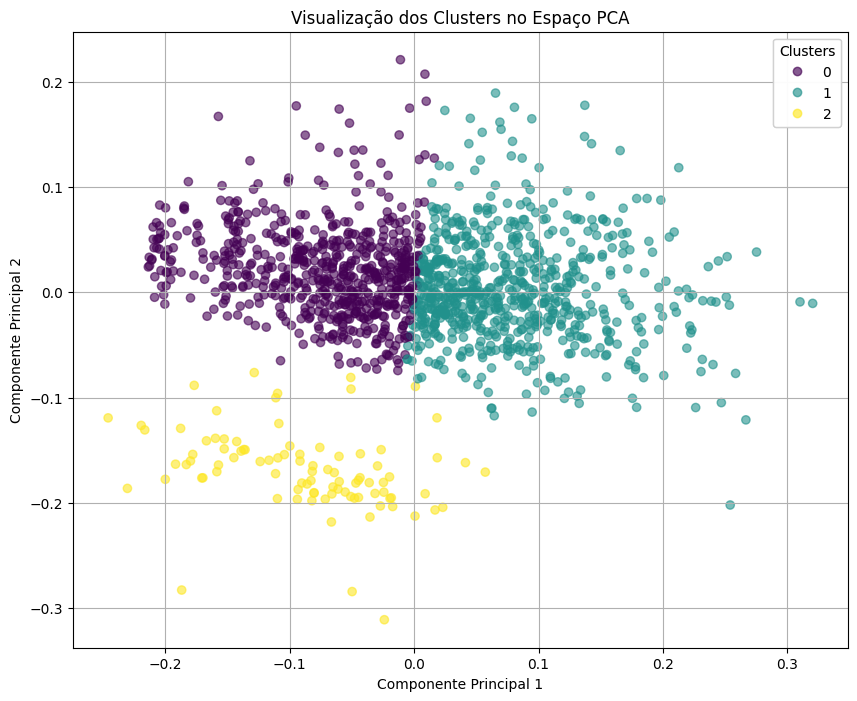


Análise da Separação dos Clusters:
Ao observar o gráfico de dispersão dos clusters no espaço das duas primeiras componentes principais:
- Se os pontos de diferentes cores estiverem bem agrupados e separados uns dos outros, isso indica que os clusters se separam de forma clara.
- Se os pontos de diferentes cores estiverem misturados ou sobrepostos significativamente, isso sugere que os clusters não estão claramente separados neste espaço de duas dimensões.

Resposta à pergunta: Observando o gráfico, os grupos...


In [92]:
# Combinando PCA e K-means
pca_df = pd.DataFrame(pca_components, columns=['Principal_Component_1', 'Principal_Component_2'], index=df_daily.index)
pca_df['Cluster'] = df_daily['Cluster']

# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['Principal_Component_1'], pca_df['Principal_Component_2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.6)

# Adicionando títulos
plt.title('Visualização dos Clusters no Espaço PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Eixos
ax = plt.gca() # Get current axes
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.grid(True)
plt.show()

print("\nAnálise da Separação dos Clusters:")
print("Ao observar o gráfico de dispersão dos clusters no espaço das duas primeiras componentes principais:")
print("- Se os pontos de diferentes cores estiverem bem agrupados e separados uns dos outros, isso indica que os clusters se separam de forma clara.")
print("- Se os pontos de diferentes cores estiverem misturados ou sobrepostos significativamente, isso sugere que os clusters não estão claramente separados neste espaço de duas dimensões.")

print("\nResposta à pergunta: Observando o gráfico, os grupos...")

Observando o gráfico, os grupos não se separam de forma completamente clara.

Cluster 2 (amarelo) parece ser o mais distinto e mais separado dos outros dois grupos.
Os Clusters 0 (roxo) e 1 (verde-azulado) mostram uma sobreposição considerável, indicando que os dias nestes dois clusters têm características de consumo elétrico mais semelhantes nas dimensões capturadas por estas duas componentes principais do PCA.
As duas primeiras componentes principais capturam cerca de 81.82% da variância original nos dados numéricos principais. Embora estas componentes reduzam a dimensionalidade, a separação dos clusters não é totalmente nítida neste espaço bidimensional, especialmente entre os clusters 0 e 1.

25. Regressão polinomial vs linear
- Modele Global_active_power em função de Voltage.
- Compare Regressão Linear Simples com Regressão Polinomial (grau 2).
- Analise RMSE e a curva ajustada.

In [93]:
# Preparando os dados

df_regression = df[['Global_active_power', 'Voltage']].copy()
df_regression = df_regression.dropna()
display(df_regression.head())
print(f"Number of remaining rows: {df_regression.shape[0]}")

,Global_active_power,Voltage
Datetime,,
2006-12-16 17:24:00,0.374796,0.376090
2006-12-16 17:25:00,0.478363,0.336995
2006-12-16 17:26:00,0.479631,0.326010
2006-12-16 17:27:00,0.480898,0.340549
2006-12-16 17:28:00,0.325005,0.403231


Number of remaining rows: 2049280


In [101]:
# Separando dados de treino

X = df_regression[['Voltage']].values
y = df_regression['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (1639424, 1)
X_test: (409856, 1)
y_train: (1639424,)
y_test: (409856,)


In [102]:
from sklearn.linear_model import LinearRegression

# Aplicando regressão linear

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [103]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Aplicando Regressão Polinomial

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [104]:
# Predição usando regressão linear
y_pred_linear = linear_model.predict(X_test)

# Transformando o teste da regressão polinomial
X_test_poly = poly_features.transform(X_test)

# Predição usando regressão polinomial
y_pred_poly = poly_model.predict(X_test_poly)


In [105]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculando MSE para regressão linear
mse_linear = mean_squared_error(y_test, y_pred_linear)
# Calculando RMSE para regressão linear
rmse_linear = np.sqrt(mse_linear)

# Calculando MSE para regressão polinomial
mse_poly = mean_squared_error(y_test, y_pred_poly)
# Calculando RMSE para regressão polinomial
rmse_poly = np.sqrt(mse_poly)

# Print RMSE values
print(f"RMSE para Regressão Linear: {rmse_linear:.4f}")
print(f"RMSE para Regressão Polinomial: {rmse_poly:.4f}")

RMSE para Regressão Linear: 0.0880
RMSE para Regressão Polinomial: 0.0876


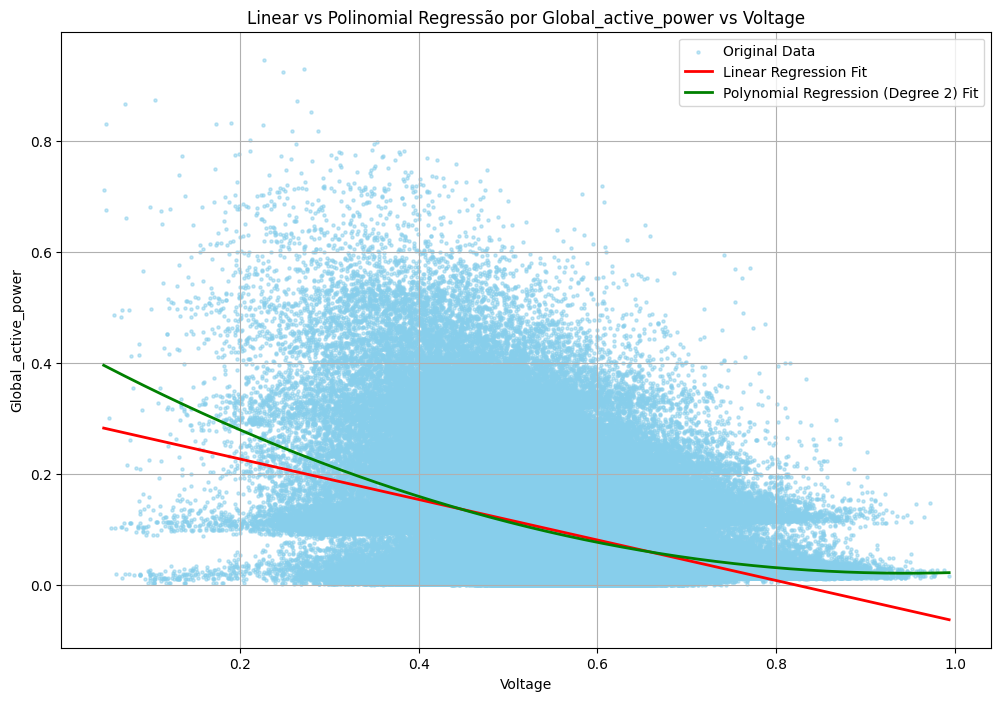

In [106]:
# Ordenando dados
X_test_sorted = np.sort(X_test, axis=0)
y_pred_linear_sorted = linear_model.predict(X_test_sorted)
X_test_poly_sorted = poly_features.transform(X_test_sorted)
y_pred_poly_sorted = poly_model.predict(X_test_poly_sorted)

plt.figure(figsize=(12, 8))

# Plot original data
plt.scatter(X_test, y_test, label='Original Data', color='skyblue', s=5, alpha=0.5)

# Plot regressão linear
plt.plot(X_test_sorted, y_pred_linear_sorted, label='Linear Regression Fit', color='red', linewidth=2)

# Plot regressão polinomial
plt.plot(X_test_sorted, y_pred_poly_sorted, label='Polynomial Regression (Degree 2) Fit', color='green', linewidth=2)

# Adicionando títulos
plt.title('Linear vs Polinomial Regressão por Global_active_power vs Voltage')
plt.xlabel('Voltage')
plt.ylabel('Global_active_power')
plt.legend()
plt.grid(True)
plt.show()

In [107]:
print("Comparação entre os Modelos de Regressão Linear e Polinomial:")
print(f"Erro Quadrático Médio (RMSE) para Regressão Linear: {rmse_linear:.4f}")
print(f"Erro Quadrático Médio (RMSE) para Regressão Polinomial (Grau 2): {rmse_poly:.4f}")

print("\nAnálise:")
print(f"- O RMSE para o modelo de Regressão Linear é {rmse_linear:.4f}.")
print(f"- O RMSE para o modelo de Regressão Polinomial (Grau 2) é {rmse_poly:.4f}.")

if rmse_poly < rmse_linear:
    print("O modelo de Regressão Polinomial tem um RMSE ligeiramente mais baixo, sugerindo que ele se ajusta ligeiramente melhor aos dados do que o modelo de Regressão Linear.")
else:
    print("O modelo de Regressão Linear tem um RMSE ligeiramente mais baixo ou igual, sugerindo que ele se ajusta ligeiramente melhor ou igualmente bem aos dados em comparação com o modelo de Regressão Polinomial.")

print("\nInspeção Visual das Curvas Ajustadas:")
print("Ao observar o gráfico, podemos ver como cada linha/curva captura o padrão dos pontos de dados originais.")
print("- A linha vermelha representa o ajuste da Regressão Linear. Ela mostra uma tendência geral, mas pode não capturar a curvatura nos dados.")
print("- A linha verde representa o ajuste da Regressão Polinomial (Grau 2). Esta curva tem a capacidade de capturar uma relação não linear, se existir.")

print("\nConclusão:")
if rmse_poly < rmse_linear:
    print(f"Com base no RMSE ligeiramente mais baixo ({rmse_poly:.4f} vs {rmse_linear:.4f}) e na inspeção visual (consulte o gráfico), o modelo de Regressão Polinomial de grau 2 parece fornecer um ajuste ligeiramente melhor aos dados para prever 'Global_active_power' a partir de 'Voltage' neste caso, pois pode potencialmente capturar uma tendência não linear sutil que o modelo linear não consegue.")
else:
    print(f"Com base no RMSE ({rmse_poly:.4f} vs {rmse_linear:.4f}) e na inspeção visual (consulte o gráfico), o modelo de Regressão Linear parece fornecer um ajuste similar ou ligeiramente melhor aos dados para prever 'Global_active_power' a partir de 'Voltage' neste caso.")


Comparação entre os Modelos de Regressão Linear e Polinomial:
Erro Quadrático Médio (RMSE) para Regressão Linear: 0.0880
Erro Quadrático Médio (RMSE) para Regressão Polinomial (Grau 2): 0.0876

Análise:
- O RMSE para o modelo de Regressão Linear é 0.0880.
- O RMSE para o modelo de Regressão Polinomial (Grau 2) é 0.0876.
O modelo de Regressão Polinomial tem um RMSE ligeiramente mais baixo, sugerindo que ele se ajusta ligeiramente melhor aos dados do que o modelo de Regressão Linear.

Inspeção Visual das Curvas Ajustadas:
Ao observar o gráfico, podemos ver como cada linha/curva captura o padrão dos pontos de dados originais.
- A linha vermelha representa o ajuste da Regressão Linear. Ela mostra uma tendência geral, mas pode não capturar a curvatura nos dados.
- A linha verde representa o ajuste da Regressão Polinomial (Grau 2). Esta curva tem a capacidade de capturar uma relação não linear, se existir.

Conclusão:
Com base no RMSE ligeiramente mais baixo (0.0876 vs 0.0880) e na inspeção 